## Import Library

In [36]:
%matplotlib inline
import time, os, sys
import numpy as np
import pandas as pd
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# For evaluating results
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_curve,
    auc,
    f1_score,
    precision_score,
    recall_score,
)

# sys.stdout = open("result.txt", "w")
start_time_script = time.time()

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Import Dataset

In [37]:
# Importing the dataset
data = pd.read_csv('C:/train.csv', index_col = ["User"])
# Drop last column from dataset
data = data.iloc[:, :-1]

# Rename category names 
data.rename(columns = {'Category 1':'Churches', 'Category 2':'Resorts', 'Category 3':'Beaches', 'Category 4':'Parks', 'Category 5':'Theatres', 'Category 6':'Museums', 'Category 7' :'Malls', 'Category 8':'Zoo', 'Category 9':'Restaurants', 'Category 10':'Pubs/Bars', 'Category 11':'Local Services', 'Category 12':'Burger/Pizza Shops', 'Category 13':'Hotels/Other Lodgings', 'Category 14':'Juice Bars', 'Category 15':'Art Galeries', 'Category 16':'Dance Clubs', 'Category 17':'Swimming Pools', 'Category 18':'Gyms', 'Category 19':'Bakeries', 'Category 20':'Beauty & Spas', 'Category 21':'Cafes', 'Category 22':'View Points', 'Category 23':'Monuments', 'Category 24':'Gardens'}, inplace=True)

print(data.shape)
print(data.head())

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs/Bars,...,Juice Bars,Art Galeries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty & Spas,Cafes,View Points,Monuments
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0


## Data Preparation

In [38]:
print(data.isna().sum())
# data.fillna(data.mean(), inplace=True)

Churches                 0
Resorts                  0
Beaches                  0
Parks                    0
Theatres                 0
Museums                  0
Malls                    0
Zoo                      0
Restaurants              0
Pubs/Bars                0
Local Services           0
Burger/Pizza Shops       0
Hotels/Other Lodgings    0
Juice Bars               0
Art Galeries             0
Dance Clubs              0
Swimming Pools           0
Gyms                     0
Bakeries                 0
Beauty & Spas            0
Cafes                    0
View Points              0
Monuments                0
dtype: int64

In [39]:
# Fill missing values with mean column values in the train set
data.fillna(data.mean(), inplace=True)
print(data.isna().sum())

Churches                 0
Resorts                  0
Beaches                  0
Parks                    0
Theatres                 0
Museums                  0
Malls                    0
Zoo                      0
Restaurants              0
Pubs/Bars                0
Local Services           0
Burger/Pizza Shops       0
Hotels/Other Lodgings    0
Juice Bars               0
Art Galeries             0
Dance Clubs              0
Swimming Pools           0
Gyms                     0
Bakeries                 0
Beauty & Spas            0
Cafes                    0
View Points              0
Monuments                0
dtype: int64

## Visualize data

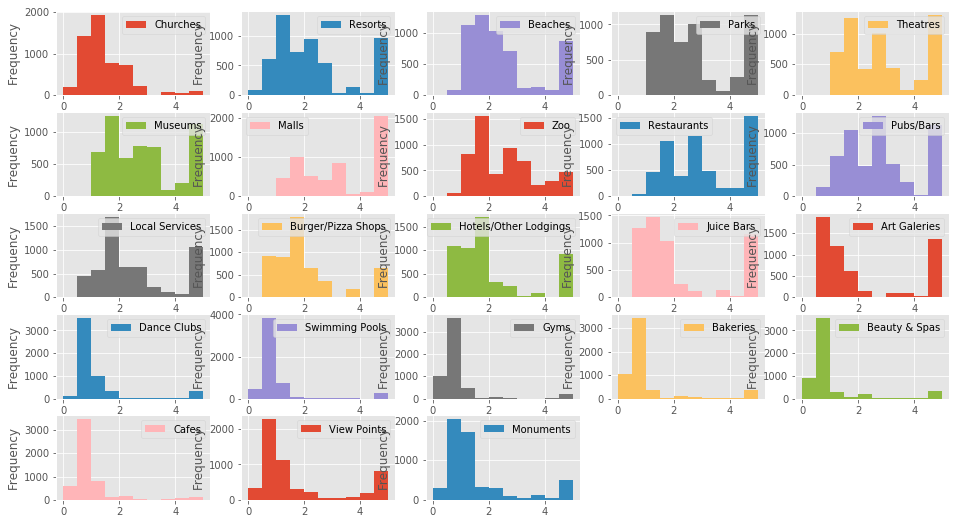

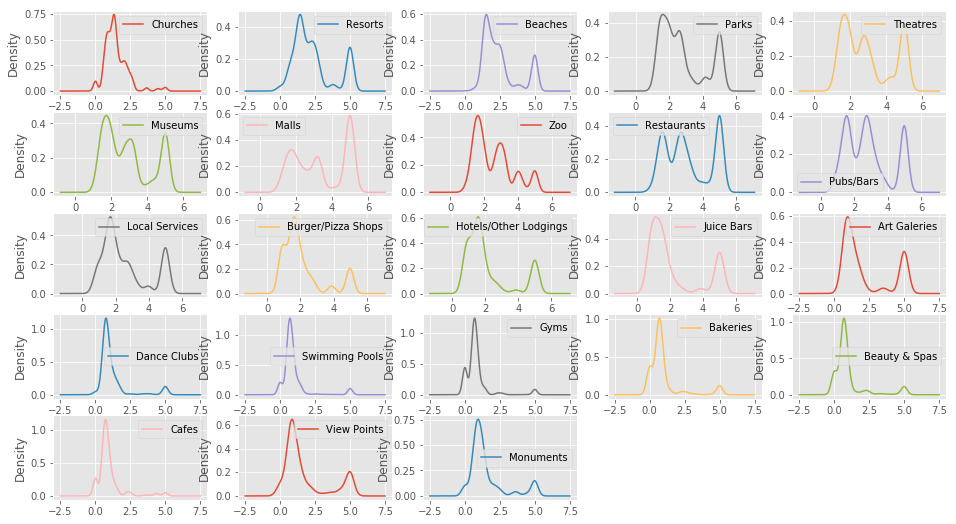

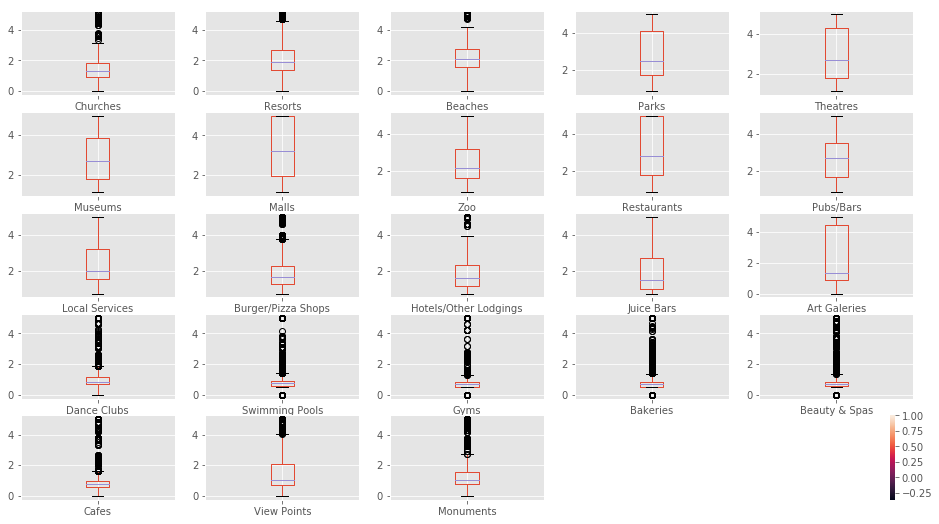

In [40]:
# Print visualize graph
data.plot(kind='hist', subplots=True, layout=(5,5), sharex=False)
plt.title("Group - 16 - All category frequency with rating - hist")

data.plot(kind='density', subplots=True, layout=(5,5), sharex=False)
plt.title("Group - 16 - All category frequency with rating - density")

data.plot(kind='box', subplots=True, layout=(5,5), sharex=False)
plt.title("Group - 16 - All category frequency with rating - box")


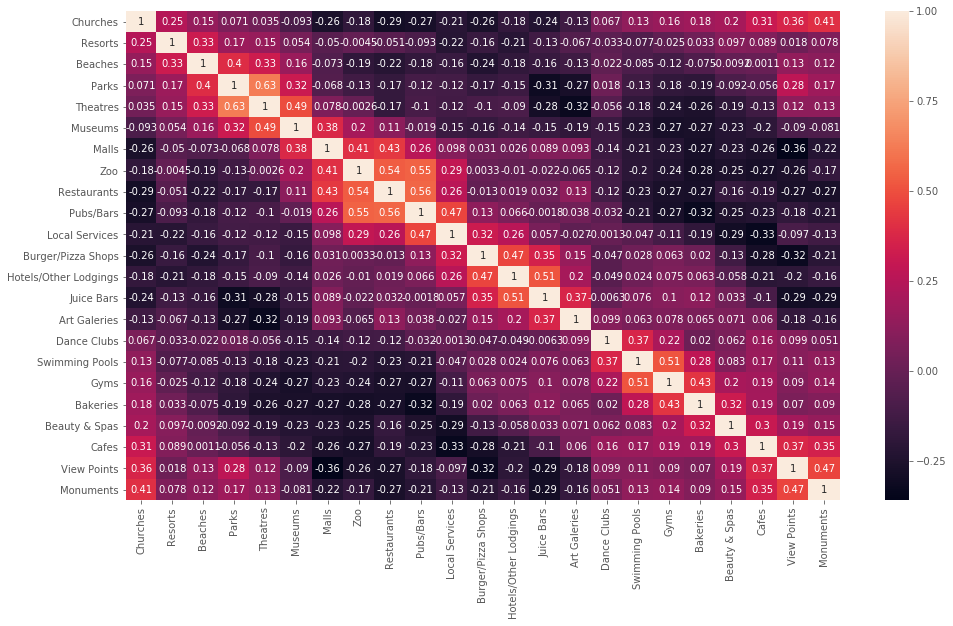

In [45]:
# generating correlation heatmap 
sns.heatmap(data.corr(), annot = True) 
plt.show() 

In [41]:
from sklearn.decomposition import PCA 
  
pca = PCA(3) 
pca.fit(data) 
  
pca_data = pd.DataFrame(pca.transform(data)) 
  
print(pca_data.head())

f1 = data['Churches'].values
f2 = data['Resorts'].values
f3 = data['Beaches'].values
f4 = data['Parks'].values
f5 = data['Theatres'].values
f6 = data['Museums'].values
f7 = data['Malls'].values
f8 = data['Zoo'].values
f9 = data['Restaurants'].values
f10 = data['Pubs/Bars'].values
f11 = data['Local Services'].values
f12 = data['Burger/Pizza Shops'].values
f13 = data['Hotels/Other Lodgings'].values
f14 = data['Juice Bars'].values
f15 = data['Art Galeries'].values
f16 = data['Dance Clubs'].values
f17 = data['Swimming Pools'].values
f18 = data['Gyms'].values
f19 = data['Bakeries'].values
f20 = data['Beauty & Spas'].values
f21 = data['Cafes'].values
f22 = data['View Points'].values
f23 = data['Monuments'].values

X = np.array(list(zip(f1, f2)))

## Custom Model - Python

In [47]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X), size=k)

# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X), size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

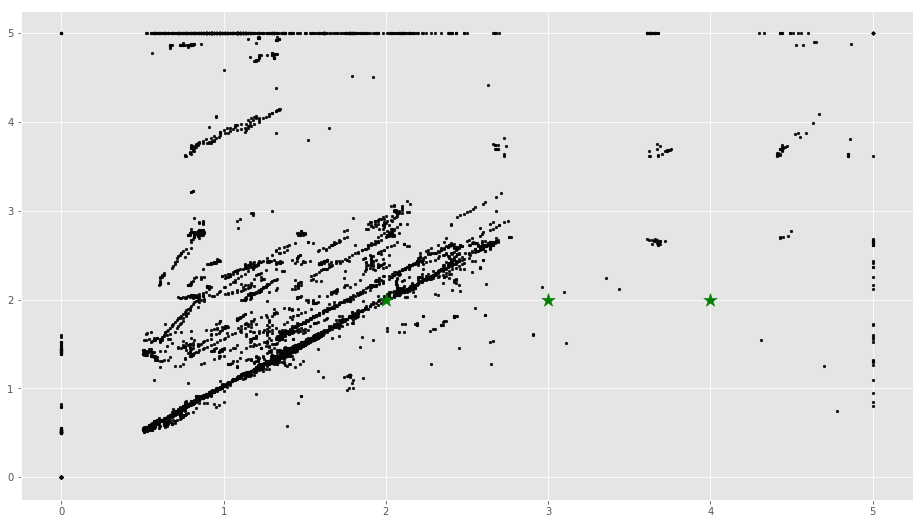

In [48]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [49]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
print(len(X))
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print(C)

# Loop will run till the error becomes zero
while error != 0:
    
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    # Storing the old centroid values
    C_old = deepcopy(C)
    
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

NameError: name 'dist' is not defined

IndexError: too many indices for array

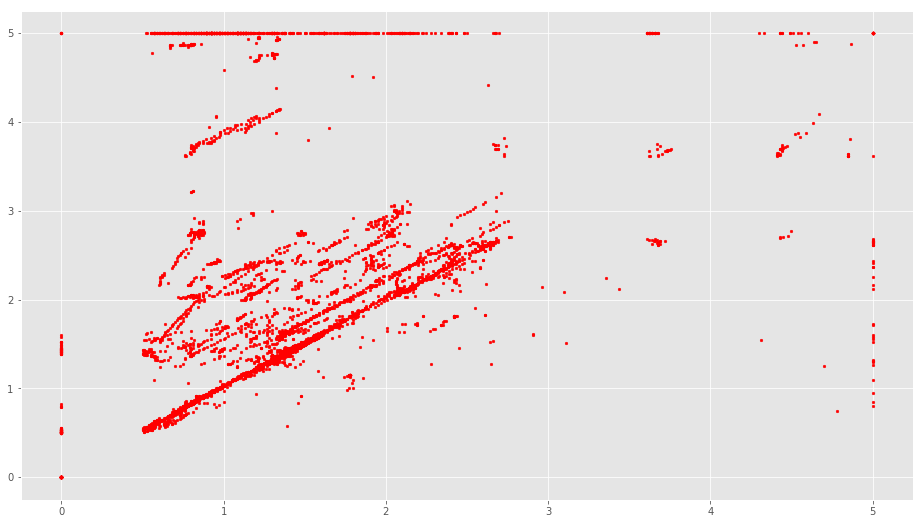

In [35]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=labels)
ax.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=1000)

## Prebuild Library - Python

In [ ]:
from sklearn.cluster import KMeans

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
centroids = kmeans.cluster_centers_

In [ ]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

In [19]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

NameError: name 'X' is not defined

## Evaluation

In [ ]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()